## This dataset contains health insurance data for US Citizens. We will apply linear regression to predict the calim(dependent variable) amount based on independent variables. 

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read datastet
df = pd.read_csv("./Dataset/healthinsurance.csv")

# EDA

In [3]:
# Checking top 5 rows of the dataset
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [4]:
# Checking the size of data
df.shape

(15000, 13)

In [5]:
# Checking the data types
df.dtypes

age                     object
sex                     object
weight                   int64
bmi                     object
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

In [6]:
df.describe()

,weight,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,64.909600,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,13.701935,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,54.000000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,63.000000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,76.000000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,95.000000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [7]:
# There are variables smoker, regular_ex, diabetes marked as numerical which should be marked as categorical
# Updating the variables 

df[['smoker','regular_ex','diabetes']] = df[['smoker','regular_ex','diabetes']].astype('object')

In [8]:
df.dtypes

age                     object
sex                     object
weight                   int64
bmi                     object
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

### Missing Value Treatment

In [9]:
# Check for missing values
df.isnull().sum()

age                    395
sex                      0
weight                   0
bmi                    955
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

#### Missing values are present in age and bmi variables.

<Axes: >

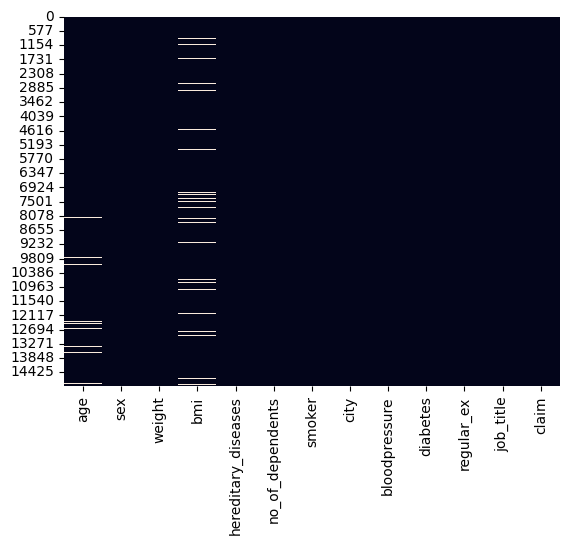

In [10]:
# Missing Values Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [11]:
# Treating Non-Standard Missing values
df.replace('?', np.nan, inplace=True)

In [12]:
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

Text(0.5, 1.0, 'Boxplot for age')

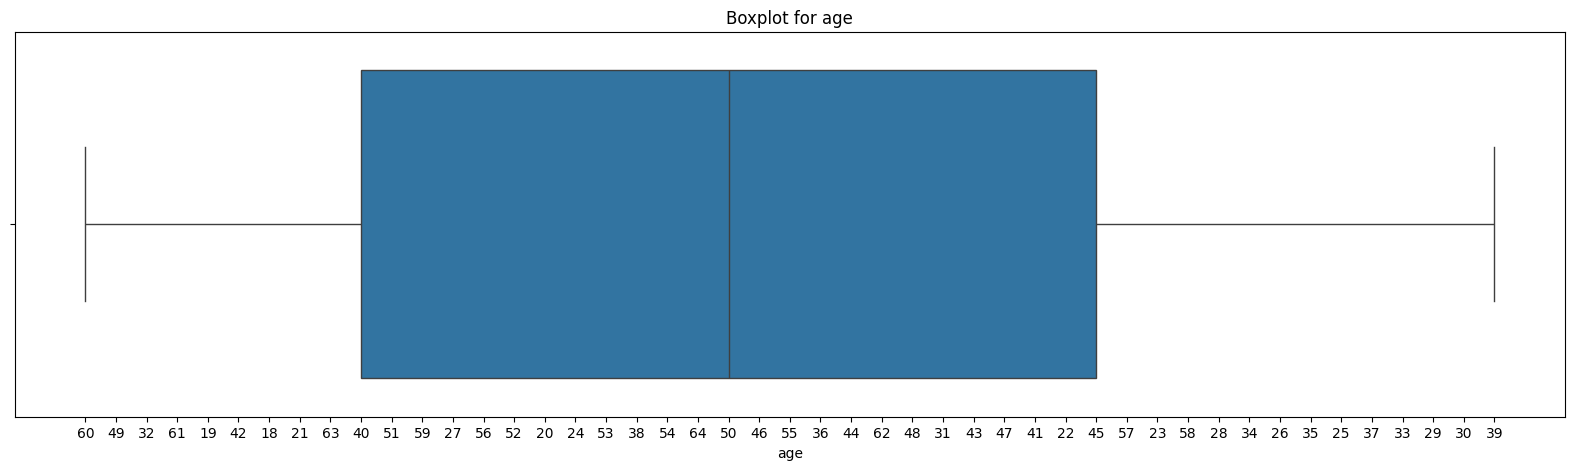

In [13]:
# Treating Standard Missing values 

# Visualizing the distribution of age variable on a boxplot and checking outliers
figure = plt.figure(figsize=(20,5))
sns.boxplot(df['age'], orient='h')
plt.title('Boxplot for age')

In [14]:
# The data point looks normally distributed without outliers.
# The median of the boxplot is located at the center of the boxplot.
# Therefore we can use mean for imputing.

In [15]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age']= df['age'].fillna(df['age'].mean())

Text(0.5, 1.0, 'Boxplot for age')

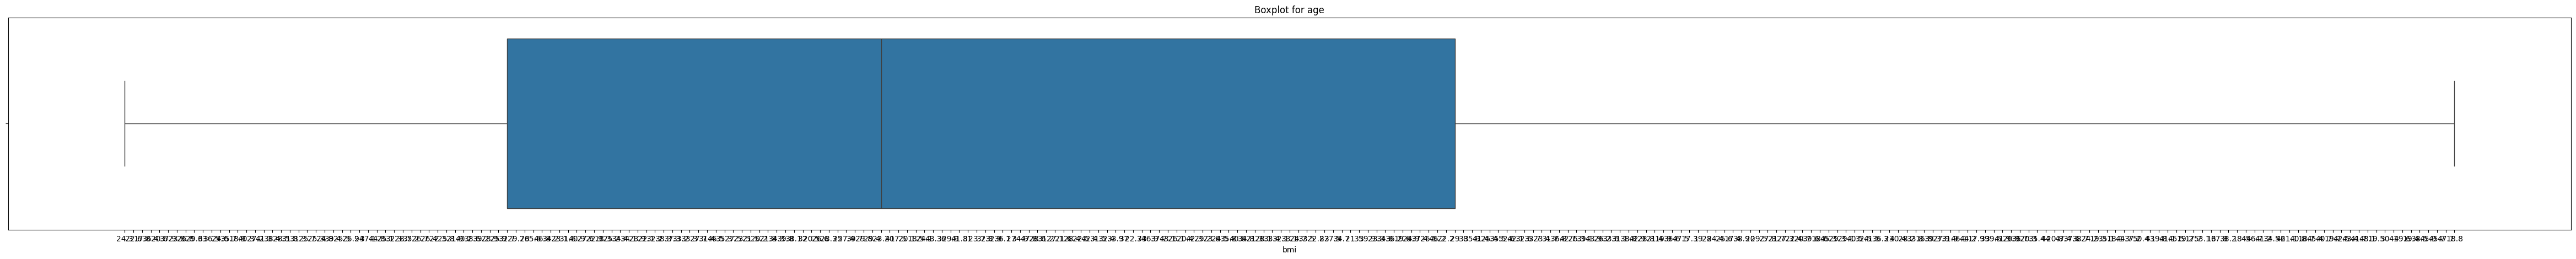

In [16]:
# Visualizing the distribution of bmi variable on a boxplot and checking outliers
figure = plt.figure(figsize=(60,5))
sns.boxplot(df['bmi'], orient='h')
plt.title('Boxplot for age')

In [17]:
# The data point looks somewhat normally distributed without outliers.
# The median of the boxplot is located at the center of the boxplot.
# Therefore we can use mean for imputing.

In [18]:
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['bmi']= df['bmi'].fillna(df['bmi'].mean())

In [19]:
# Validating the treatment od missing values
df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

### Encoding

In [20]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [21]:
# Variables sex, hereditary_diseases, city, job_title have categorical variables which can be encoded.
# However, the cities have 2 many categories, which needed to encoded a region.

In [22]:
# create a region column and combine the north-east cities
df['region'] = df['city'].replace(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
                                                       'AtlanticCity','Portland', 'Cambridge', 'Hartford', 
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester'],
                                                      'North-East')

In [23]:
# combine all the southern cities into the 'region' column
df['region'] = df['region'].replace(['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall'],
                                                         'Southern')

In [24]:
# combine all the mid-west cities into the 'region' column
df['region'] = df['region'].replace(['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis', 
                                                         'JeffersonCity', 'Escabana','Youngstown'],
                                                         'Mid-West')

In [25]:
# combine all the western cities into the 'region' column
df['region'] = df['region'].replace(['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside', 
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock'],
                                                         'West')

In [26]:
# Segregating Categorical and Numerical Variables
df_num = df.select_dtypes(include = [np.number])
df_cat = df.select_dtypes(include = 'object')
df_cat =df_cat.drop('city', axis =1)

### Outlier Treatment

In [27]:


def remove_outlier(col):
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR) 
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [28]:
for column in df_num.columns:
    lr,ur = remove_outlier(df[column])
    df[column] = np.where(df[column]>ur,ur,df[column])
    df[column] = np.where(df[column]<lr,lr,df[column])
    

In [29]:
# N-1 Encoding for Categorical variables
dummy_var_oh = pd.get_dummies(df_cat)
dummy_var_oh.head().shape

(5, 57)

In [30]:
# N-1 Encoding for Categorical variables
dummy_var = pd.get_dummies(df_cat, drop_first=True)
dummy_var.head().shape

(5, 50)

In [31]:
print("Min values of variables before scaling:")
print(df_num.describe().min())
print("Max values of variables before scaling:")
print(df_num.describe().max())

Min values of variables before scaling:
age                   13.829705
weight                13.701935
bmi                    5.924606
no_of_dependents       0.000000
bloodpressure          0.000000
claim               1121.900000
dtype: float64
Max values of variables before scaling:
age                 15000.0
weight              15000.0
bmi                 15000.0
no_of_dependents    15000.0
bloodpressure       15000.0
claim               63770.4
dtype: float64


In [32]:
# Log Transformation and dropping the Target Vector
df_target = np.log(df_num['claim'])
print(df_target.shape)

df_num = df_num.drop('claim', axis = 1)
print(df_num.shape)


(15000,)
(15000, 5)


### Scaling

In [33]:
# Standard Scaling 
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

df_num_scaled = standard_scaler.fit_transform(df_num)

In [34]:
# Converting Numpy Array to Pandas Dataframe
df_num_scaled = pd.DataFrame(df_num_scaled, columns=df_num.columns)

In [35]:
print("Min values of variables after scaling:")
print(df_num_scaled.describe().min())
print("Max values of variables after scaling:")
print(df_num_scaled.describe().max())

Min values of variables after scaling:
age                -1.558113
weight             -2.255932
bmi                -2.408074
no_of_dependents   -0.919658
bloodpressure      -3.535410
dtype: float64
Max values of variables after scaling:
age                 15000.0
weight              15000.0
bmi                 15000.0
no_of_dependents    15000.0
bloodpressure       15000.0
dtype: float64


In [36]:
print("Mean of variables after scaling:")
print(df_num_scaled.mean())
print("Standard Deviation variables after scaling:")
print(df_num_scaled.std())

Mean of variables after scaling:
age                -2.453741e-16
weight              1.743198e-16
bmi                 2.385055e-16
no_of_dependents    6.394885e-17
bloodpressure       2.160050e-16
dtype: float64
Standard Deviation variables after scaling:
age                 1.000033
weight              1.000033
bmi                 1.000033
no_of_dependents    1.000033
bloodpressure       1.000033
dtype: float64


In [37]:
# Min Max Scaling 
from sklearn.preprocessing import MinMaxScaler 

min_max = MinMaxScaler()

df_num_min_max_scaled = min_max.fit_transform(df_num)

In [38]:
# Converting Numpy Array to Pandas Dataframe
df_num_min_max_scaled = pd.DataFrame(df_num_min_max_scaled,columns=df_num.columns)

In [39]:
print("Min:\n",df_num_min_max_scaled.describe().min())
print("Max:\n",df_num_min_max_scaled.describe().max())
print("Mean:\n",df_num_min_max_scaled.describe().mean())
print("Std Dev:\n", df_num_min_max_scaled.describe().std())

Min:
 age                 0.0
weight              0.0
bmi                 0.0
no_of_dependents    0.0
bloodpressure       0.0
dtype: float64
Max:
 age                 15000.0
weight              15000.0
bmi                 15000.0
no_of_dependents    15000.0
bloodpressure       15000.0
dtype: float64
Mean:
 age                 1875.395047
weight              1875.402892
bmi                 1875.333865
no_of_dependents    1875.258955
bloodpressure       1875.435521
dtype: float64
Std Dev:
 age                 5303.141245
weight              5303.138074
bmi                 5303.165965
no_of_dependents    5303.196235
bloodpressure       5303.124891
dtype: float64


### Prepairing X and y for train_test_split

In [40]:
y = (df_target - df_target.mean())/df_target.std()

X = pd.concat([df_num_scaled, dummy_var], axis=1)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

regression_model.fit(X_train,y_train)


LinearRegression()

In [43]:
# R Square via Linear Regression
print("Linear Regression R-Square:",regression_model.score(X_train, y_train))

Linear Regression R-Square: 0.7469343745529142


### OLS Linear Regression

In [44]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

In [45]:
X_train.dtypes

const                               float64
age                                 float64
weight                              float64
bmi                                 float64
no_of_dependents                    float64
bloodpressure                       float64
sex_male                               bool
hereditary_diseases_Arthritis          bool
hereditary_diseases_Cancer             bool
hereditary_diseases_Diabetes           bool
hereditary_diseases_Epilepsy           bool
hereditary_diseases_EyeDisease         bool
hereditary_diseases_HeartDisease       bool
hereditary_diseases_High BP            bool
hereditary_diseases_NoDisease          bool
hereditary_diseases_Obesity            bool
smoker_1                               bool
diabetes_1                             bool
regular_ex_1                           bool
job_title_Accountant                   bool
job_title_Actor                        bool
job_title_Analyst                      bool
job_title_Architect             

In [46]:
# X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
# X_train.dropna(inplace=True)

# bool_columns = X_train.select_dtypes(include='object')

# X_train[bool_columns] = X_train[bool_columns].astype(int)

In [47]:
# X_train.dtypes

In [48]:
# model = sm.OLS(y_train, X_train)
# result = model.fit()
# result.summary()

#### Applying Lasso 

#### Applying Ridge

### Logistic Regression
##### Preidct if the Salary is <=50K or >50K

In [49]:
data = pd.read_csv('./Dataset/adult-Copy1.data-1.csv')

In [50]:
data.head()

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40,<=50K


In [51]:
data.dtypes

age                        int64
workclass                 object
education                 object
marrital status           object
occupation                object
sex                       object
capital gain               int64
capital loss               int64
working hours per week     int64
salary                    object
dtype: object

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   education               32561 non-null  object
 3   marrital status         32561 non-null  object
 4   occupation              32561 non-null  object
 5   sex                     32561 non-null  object
 6   capital gain            32561 non-null  int64 
 7   capital loss            32561 non-null  int64 
 8   working hours per week  32561 non-null  int64 
 9   salary                  32561 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.5+ MB


###### The dataset does not have any variables marked with incorrect datatype and null values

In [53]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
capital gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working hours per week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


##### Observations:
##### 1> There are outliers in capital gain and capital loss variable.We may need to perform outlier treatment and scaling.
##### 2> There are multiple categorical variables which need to be encoded.

#### N-1 Encoding

In [54]:
data_cat = data.select_dtypes(include='object')
data_cat = data_cat.drop('salary', axis=1)
data_num = data.select_dtypes(include='int64')

In [55]:
dummy_var = pd.get_dummies(data_cat, drop_first=True)

In [56]:
dummy_var.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Male
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


###### Convert Boolean to integers 

In [57]:
dummy_var = dummy_var.astype(int)

In [58]:
dummy_var.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Male
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [59]:
print(data_cat.shape)
print(data_num.shape)

(32561, 5)
(32561, 4)


In [61]:
y = data['salary']


In [62]:
X = pd.concat([data_num,dummy_var], axis =1)

In [63]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [65]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [66]:
model.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
#y_pred = model.predict(X_test)

In [70]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Calculate precision
# precision = precision_score(y_test, y_pred)
# print("Precision:", precision)

# # Calculate recall
# recall = recall_score(y_test, y_pred)
# print("Recall:", recall)

In [72]:
model.score(X_test, y_test)

0.8390828129798341

In [73]:
y_probs = model.predict_proba(X_test)[:,1]

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

ValueError: y_true takes value in {' <=50K', ' >50K'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.